In [151]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource
import random
from IPython.display import clear_output
plt.rcParams['figure.figsize'] = [12, 7]

# Evolutionary Dynamics Toy Models

In this notebook we will experiment with a toy model of evolution: a population evolving on a two dimensional fitness landscape. I used this to give demonstrations in the lecture, and I'm providing it in case you want to experiment with it.

Each example will define the `landscape` variable, which is an `n` by `m` array of numbers. The $(i,j)^\text{th}$ entry is interpreted as the fitness of an individual with genotype $(i,j)$.

First some functions to plot the landscapes:

In [152]:
def plot_landscape_3d():
    X = np.arange(0,n,1)
    Y = np.arange(0,n,1)
    X, Y = np.meshgrid(X, Y)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(X, Y, landscape)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("fitness")
    plt.show()

def plot_landscape_2d():
    plt.imshow(landscape, vmin=0, vmax=4)
    plt.colorbar()
    plt.show()

Next some functions to simulate evolution.

The way this works is as follows. We sample members of the population randomly (with replacement) proportional to their fitness, to form the next generation. We then apply mutation, which consists of adding Gaussian noise to their genotype, rounded to the nearest integer. The mutation rate, `mrate`, determines the variance of this Gaussian.

Individuals with a higher fitness are more likely to be sampled, so on average they will have more offspring than individuals with a lower fitness.

In [153]:
def plot_population():
    plt.imshow(landscape, cmap='viridis', vmin=0, vmax=4)
    plt.colorbar()
    plt.plot(xs,ys,'w.')
    plt.show()

def mutate(arr, mrate):
    """mutate an array of integers by adding +1 or -1 to each
    entry, with probability given by mrate"""
    
    array_size = len(arr)
    
    # to get the mutations we just sample from a Gaussian
    # and round it to the nearest integer
    mutations = np.round(np.random.standard_normal(popsize)*mrate)
    mutations = mutations.astype(int)

    return arr + mutations
    
def update():
    global xs, ys
    
    ## selection step
    
    # first calculate the fitness of each individual
    fitness = landscape[xs,ys]
    
    # then select popsize individuals proportional to their fitness
    # (by sampling with replacement from the current popuation)
    new_indices = random.choices(
        range(popsize),
        weights=fitness,
        k=popsize
    )

    ## mutation step
    xs = mutate(xs[new_indices], mrate) % n
    ys = mutate(ys[new_indices], mrate) % m
    
def evolve(nsteps):
    global xs, ys
    xs = np.random.randint(0,n,popsize)
    ys = np.random.randint(0,m,popsize)
    for i in range(nsteps):
        update()
        clear_output(wait=True)
        plot_population()

def evolve_corner_init(nsteps):
    global xs, ys
    xs = np.ones(popsize,dtype=int)*10
    ys = np.ones(popsize,dtype=int)*10
    for i in range(nsteps):
        update()
        clear_output(wait=True)
        plot_population()

# Smooth landscape

Now we can start the demonstrations. First is the classic "hill" landscape - fitness is higher in the middle and lower towards the edge. We can plot it in 3D and as a 2D heat map.

In [154]:
n = 100
m = 100

X = np.arange(-n/2,n/2,1)
Y = np.arange(-m/2,m/2,1)
X, Y = np.meshgrid(X, Y)
    
landscape = np.exp(-0.001 * (X*X + Y*Y) )*2

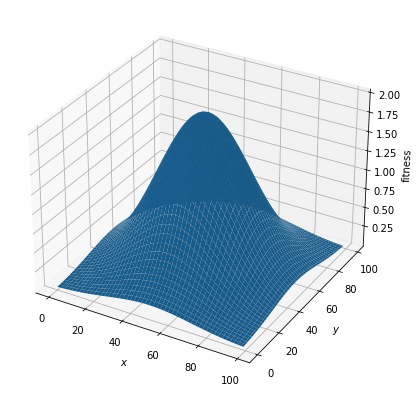

In [155]:
plot_landscape_3d()

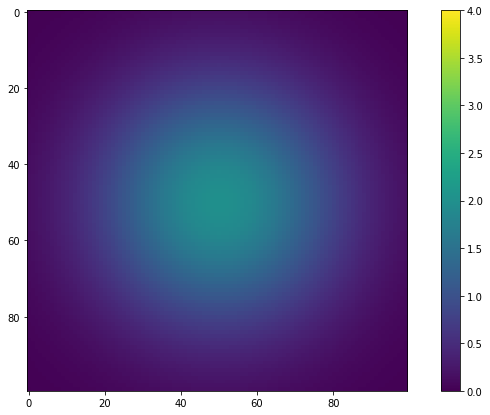

In [157]:
plot_landscape_2d()

Now we can simulate evolution. We use a population size of 1000 and a mutation rate of 0.5.

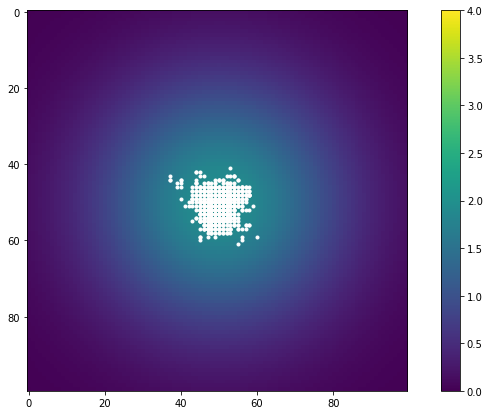

In [159]:
popsize = 1000
mrate = 0.5

evolve(200)


You can see that the population gradually becomes concentrated towards the top of the 'hill', because the replication rate is higher for individuals with genotypes near the centre.

We can also start the simulation from a population that's concentrated near one of the corners:

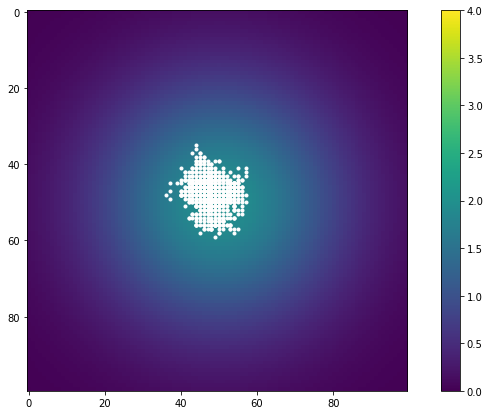

In [161]:
evolve_corner_init(200)

You can see that the population moves gradually towards the top of the hill. Some individuals happen to have a higher fitness than others, so they have more offspring. Their offspring might have mutations that make their fitness even higher, so overall the population moves towards the peak.

# The single-peak landscape

This is a two dimensional analogue of the error threshold landscape. We have one genotype that is fitter than all the others. The other ones can still replicate, but their fitness is lower.

I have changed this slightly since the lecture. I decreased the height of the peak from 3.0 to 2.0, and I also increased the population size, which makes it much more likely that the population will find the peak.

You should find that with a mutation rate of 0.5 the population will become concentrated around the peak. With a high enough mutation rate (1.0 or 2.0) it won't. The population might sometimes become clustered around the peak, but the sub-populations far away from the peak will never quite die out.

If the population doesn't cluster around the peak with a mutation rate of 0.5, it's probably because by chance no individuals had a genotype of (50,50). In that case, just run the simulation again.

In [173]:
n = 100
m = 100

landscape = np.ones((n,m))*1.0
landscape[50,50] = 2.0


In [ ]:
plot_landscape_3d()

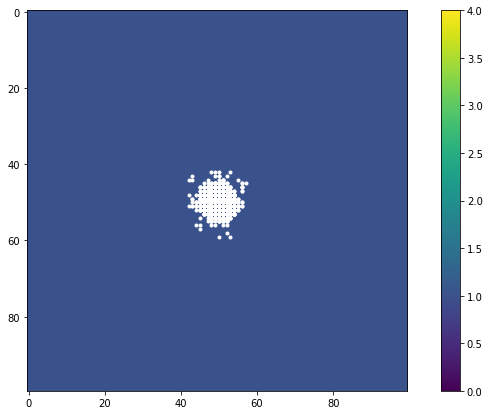

In [172]:
# try changing this to 1.0 or 2.0
mrate = 0.5
popsize = 5000

# you can increase 200 to a bigger number if you want to run it for longer
evolve(200)

In [174]:
n = 100
m = 100

landscape = np.ones((n,m))*1.0
landscape[20:23, 20:23] = 3.0
landscape[65:80, 65:80] = 2.0


# Survival of the flattest

In this landscape there are two peaks: one high and narrow, and one broad but less high. Depending on the mutation rate, selection can either favour the "fittest" peak or the "flattest" one. This is because it's easier for the population to stay on the flatter peak when the mutation rate is high.

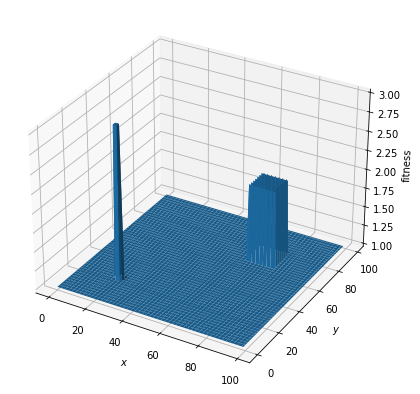

In [179]:
plot_landscape_3d()

Now we simulate evolution. You should find:

 * when the mutation rate is 0.5, selection favours the higher peak
 
 * when the mutation rate is 1.0, selection favours the broader peak
 
It might be that by chance one of the peaks doesn't get populated, so you might have to run it a few times.

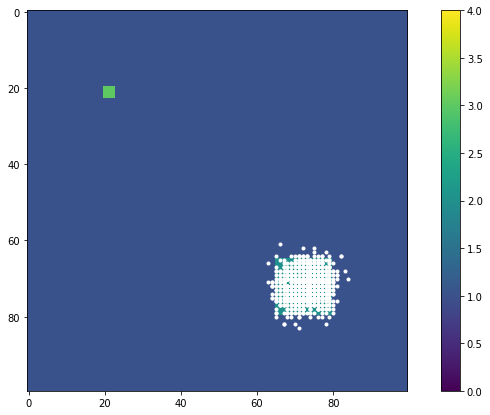

In [184]:
popsize = 1000

# try changing this to 1.0
mrate = 0.5

evolve(200)